In [3]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)):
  dst ="covid" + str(count) + ".png"
  src =path+ filename
  dst =path+ dst
  # rename() function will
  # rename all the files
  os.rename(src, dst)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)):
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename
  dst =path+ dst
  # rename() function will
  # rename all the files
  os.rename(src, dst)

In [4]:
# Initiate base directory
base_dir = '/content/covid19_CT'
os.mkdir(base_dir)

In [5]:
# Create directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

In [6]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 50
total validation NonCovid images: 50
total test Covid images: 48
total test NonCovid images: 48


In [8]:
# Create and Compile the Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
# Fit the model
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

<ipython-input-10-faf634ef1515>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
 25/100 [======>.......................] - ETA: 5s - loss: 0.7647 - acc: 0.5000

100/100 [==============================] - 15s 25ms/step - loss: 0.7647 - acc: 0.5000 - val_loss: 0.6898 - val_acc: 0.5300


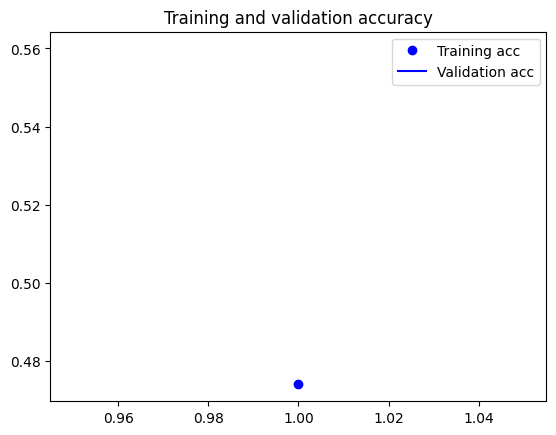

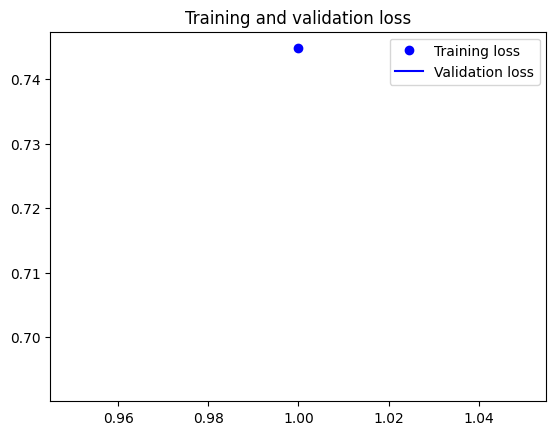

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Improving the model using Dropout and Data Augmentation

#### 1. What is Dropout?

![alt text](https://miro.medium.com/max/3000/1*ui3IvoiVYBFtaU0auj63ew.gif)

#### 2. What is Data Augmentation

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
* `rescale` is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
* `shear_range` is for randomly applying shearing transformations
* `zoom_range` is for randomly zooming inside pictures
* `horizontal_flip` is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

Example:
![Image taken from blog.keras.io](https://blog.keras.io/img/imgclf/cat_data_augmentation.png)

In [12]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model1.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


<ipython-input-13-544bf8d2d9eb>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_generator,


Epoch 1/20
 16/100 [===>..........................] - ETA: 23s - loss: 0.7448 - acc: 0.4740

100/100 [==============================] - 8s 53ms/step - loss: 0.7448 - acc: 0.4740 - val_loss: 0.6927 - val_acc: 0.5600


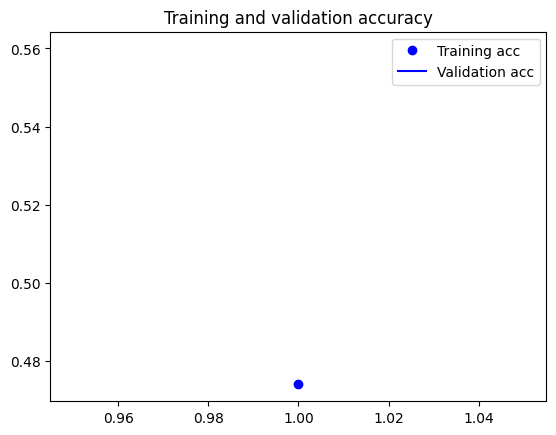

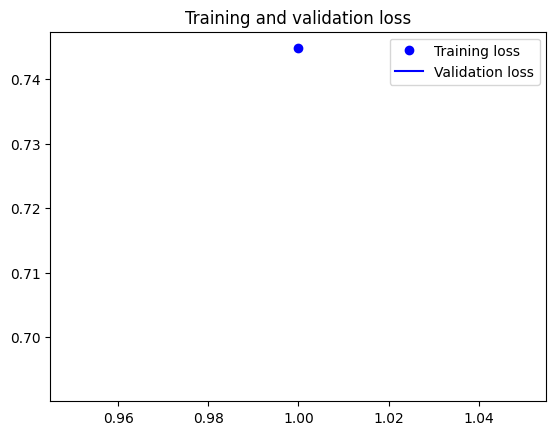

In [14]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()